In [77]:
import warnings
warnings.simplefilter(action='ignore')

In [78]:
import scanpy as sc
import torch
import scarches as sca
import numpy as np

In [79]:
sc.set_figure_params(frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(4, 4))
torch.set_printoptions(precision=3, sci_mode=False, edgeitems=7)

In [80]:
adata = sc.read('../dataset/tyser.h5ad')
hips = sc.read("../dataset/hiPSC.h5ad")

In [81]:
sca.utils.add_annotations(adata, '../metadata/reactome.gmt', min_genes=12, clean=True)

In [82]:
adata._inplace_subset_var(adata.varm['I'].sum(1)>0)

In [83]:
sc.pp.normalize_total(adata)

In [84]:
sc.pp.log1p(adata)

In [85]:
adata.obs['batch'] = 'reference'

In [86]:
sc.pp.highly_variable_genes(
    adata,
    n_top_genes=2000,
    batch_key="batch",
    subset=True)

In [87]:
select_terms = adata.varm['I'].sum(0) > 12
adata.uns['terms'] = np.array(adata.uns['terms'])[select_terms].tolist()
adata.varm['I'] = adata.varm['I'][:, select_terms]

In [88]:
adata._inplace_subset_var(adata.varm['I'].sum(1) > 0)

In [89]:
adata.raw.X.shape

(1069, 57490)

In [90]:
adata.X.shape

(1069, 1977)

In [91]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,Source.Name,Characteristics.sampling.site.,Characteristics.inferred.cell.type...authors.labels.,Characteristics.inferred.cell.type...ontology.labels.,cluster_id,sub_cluster,origin,run,sample_name,timepoint,percent.mt,batch
SS.sc7786612,0,259888.990001,6942,SS.sc7786612,rostral,endodermal cell,endodermal cell,Endoderm,DE(P),tyser,tyser,tyser,tyser,1.304482,reference
SS.sc7786605,0,437911.014986,6140,SS.sc7786605,rostral,advanced mesoderm,mesoderm cell,Advanced Mesoderm,Advanced Mesoderm,tyser,tyser,tyser,tyser,1.295160,reference
SS.sc7785737,0,322351.983054,3800,SS.sc7785737,caudal,primitive streak,primitive streak cell,Primitive Streak,Primitive Streak,tyser,tyser,tyser,tyser,1.294179,reference
SS.sc7785398,0,394318.996000,2964,SS.sc7785398,yolk sac,yolk sac mesoderm,mesenchyme of yolk sac,ExE Mesoderm,YS Mesoderm,tyser,tyser,tyser,tyser,1.423720,reference
SS.sc7788091,0,298217.993000,5030,SS.sc7788091,caudal,axial mesoderm,chordamesodermal cell,Axial Mesoderm,Axial Mesoderm,tyser,tyser,tyser,tyser,1.327328,reference
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SS.sc7785965,0,226569.027995,6361,SS.sc7785965,caudal,epiblast cell,epiblast cell,Epiblast,Epiblast,tyser,tyser,tyser,tyser,1.675409,reference
SS.sc7788259,0,353921.980998,4647,SS.sc7788259,caudal,primitive streak,primitive streak cell,Primitive Streak,Primitive Streak,tyser,tyser,tyser,tyser,1.615045,reference
SS.sc7786123,0,366998.009999,2822,SS.sc7786123,caudal,primitive streak,primitive streak cell,Primitive Streak,Primitive Streak,tyser,tyser,tyser,tyser,1.602395,reference
SS.sc7786212,0,459601.642974,6110,SS.sc7786212,caudal,epiblast cell,epiblast cell,Epiblast,Epiblast,tyser,tyser,tyser,tyser,1.150624,reference


In [92]:
#adata.X = adata.raw.X.copy()
adata.X = adata.X.copy()

In [93]:
missing_genes = [gene for gene in adata.var_names if gene not in hips.var_names]
print(f"Aantal genen in hips die niet in tyser staan: {len(missing_genes)}")
print("Ontbrekende genen:", missing_genes)

Aantal genen in hips die niet in tyser staan: 136
Ontbrekende genen: ['ABCA10', 'ACMSD', 'ACSL5', 'AGXT2', 'ALB', 'APOC3', 'BBOX1', 'BLNK', 'BMX', 'C1QA', 'C1QB', 'C1QC', 'C3AR1', 'C6', 'C8A', 'C8B', 'C9', 'CACNG3', 'CCL22', 'CCL3L3', 'CCR3', 'CCR4', 'CD180', 'CD40LG', 'CD80', 'CETP', 'CGB5', 'CGB8', 'CHRM5', 'CHRNB3', 'CLDN22', 'CTGF', 'CX3CR1', 'CYBB', 'CYP2W1', 'CYP4B1', 'CYP4F2', 'DBH', 'DEFB104A', 'ENPP7', 'F2RL3', 'FCGR1A', 'FCGR2B', 'FMO3', 'FPR1', 'GABRA6', 'GATA1', 'GBA3', 'GBP5', 'GLRA2', 'GLYAT', 'GP9', 'GPR65', 'GPX1', 'HAL', 'HBB', 'HBD', 'HBE1', 'HCAR3', 'HK3', 'HMGCS2', 'HRG', 'HTR5A', 'IL1RN', 'IL2RG', 'IL3', 'ITGAL', 'KCNJ16', 'KCNV2', 'LILRA1', 'LILRB2', 'LIPC', 'LY86', 'LYVE1', 'MBOAT4', 'MC3R', 'MMP13', 'MMRN1', 'MPL', 'MUC6', 'MYBPC1', 'NLRC4', 'NMUR2', 'NPPA', 'NPSR1', 'NR0B2', 'NTSR2', 'OAS2', 'OLR1', 'OR2A42', 'OR2L13', 'OR2W3', 'OR3A1', 'OR51E1', 'OR51E2', 'OR51L1', 'OR6V1', 'OR8K1', 'PIK3CG', 'PIK3R6', 'PLA2G16', 'PLA2G4D', 'PLEK', 'PLG', 'PLXNB3', 'PNLIPRP2',

In [94]:
commom = adata.var_names.intersection(hips.var_names)
hips = hips[:, commom].copy()
adata = adata[:, commom].copy()


In [95]:
adata

AnnData object with n_obs × n_vars = 1069 × 1841
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Source.Name', 'Characteristics.sampling.site.', 'Characteristics.inferred.cell.type...authors.labels.', 'Characteristics.inferred.cell.type...ontology.labels.', 'cluster_id', 'sub_cluster', 'origin', 'run', 'sample_name', 'timepoint', 'percent.mt', 'batch'
    var: 'features', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'terms', 'log1p', 'hvg'
    varm: 'I'

In [96]:
intr_cvae = sca.models.EXPIMAP(
    adata=adata,
    condition_key='batch',
    hidden_layer_sizes=[256, 256, 256],
    recon_loss='nb'
)


INITIALIZING NEW NETWORK..............
Encoder Architecture:
	Input Layer in, out and cond: 1841 256 1
	Hidden Layer 1 in/out: 256 256
	Hidden Layer 2 in/out: 256 256
	Mean/Var Layer in/out: 256 224
Decoder Architecture:
	Masked linear layer in, ext_m, ext, cond, out:  224 0 0 1 1841
	with hard mask.
Last Decoder layer: softmax


In [97]:
ALPHA = 0.7

adata.X = adata.X.astype(np.float32)

In [98]:
early_stopping_kwargs = {
    "early_stopping_metric": "val_unweighted_loss", # val_unweighted_loss
    "threshold": 0,
    "patience": 50,
    "reduce_lr": True,
    "lr_patience": 13,
    "lr_factor": 0.1,
}
intr_cvae.train(
    n_epochs=400,
    alpha_epoch_anneal=100,
    alpha=ALPHA,
    alpha_kl=0.5,
    weight_decay=0.,
    early_stopping_kwargs=early_stopping_kwargs,
    use_early_stopping=True,
    monitor_only_val=False,
    seed=2020,
)

Preparing (1069, 1841)
Instantiating dataset
Init the group lasso proximal operator for the main terms.
 |███-----------------| 16.0%  - epoch_loss: 1563.5786895752 - epoch_recon_loss: 1472.8034210205 - epoch_kl_loss: 288.1754760742 - val_loss: 1554.3493652344 - val_recon_loss: 1463.6497802734 - val_kl_loss: 287.93536376952

KeyboardInterrupt: 

In [27]:
MEAN = False

In [28]:
MEAN = False

In [ ]:
adata.obsm['X_cvae'] = intr_cvae.get_latent(mean=MEAN, only_active=True)

In [29]:
sc.pp.neighbors(adata, use_rep='X_cvae')

In [30]:
sc.tl.umap(adata)

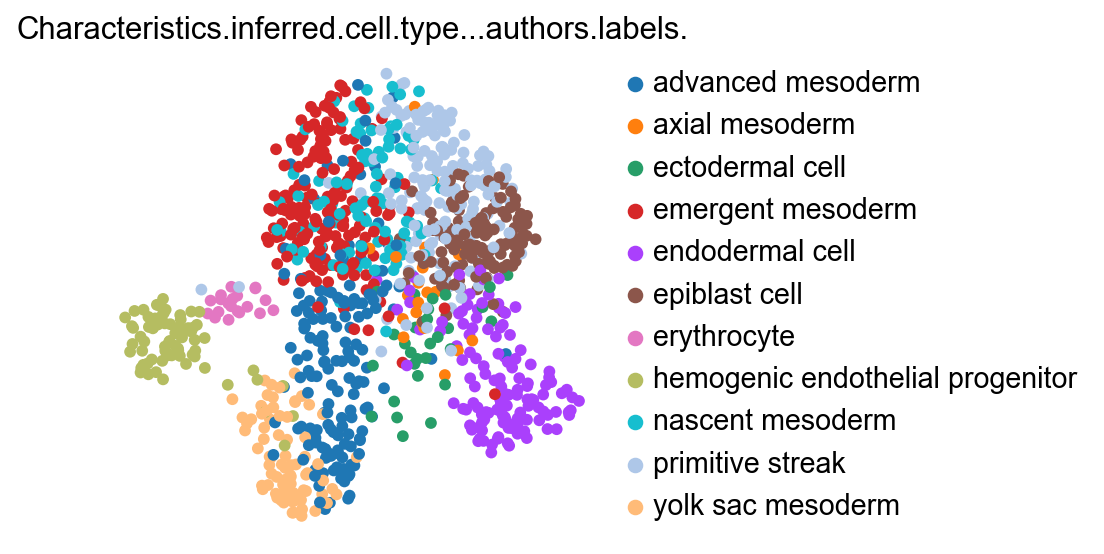

In [31]:
sc.pl.umap(adata, color=['Characteristics.inferred.cell.type...authors.labels.'], frameon=False)

In [32]:
hips.obs['batch'] = 'query'

In [33]:
hips.X = hips.X.astype(np.float32)


In [34]:
q_intr_cvae = sca.models.EXPIMAP.load_query_data(hips, intr_cvae)

AnnData object with n_obs × n_vars = 4694 × 1841
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'run', 'sample_name', 'percent.mt', 'percent.dissoc', 'RNA_snn_res.0.3', 'seurat_clusters', 'RNA_snn_res.0.22', 'batch'
    var: 'features'
    uns: 'neighbors'
    obsm: 'X_mnn', 'X_umap'
    obsp: 'distances'

INITIALIZING NEW NETWORK..............
Encoder Architecture:
	Input Layer in, out and cond: 1841 256 2
	Hidden Layer 1 in/out: 256 256
	Hidden Layer 2 in/out: 256 256
	Mean/Var Layer in/out: 256 224
Decoder Architecture:
	Masked linear layer in, ext_m, ext, cond, out:  224 0 0 2 1841
	with hard mask.
Last Decoder layer: softmax


In [35]:
q_intr_cvae.train(n_epochs=400, alpha_epoch_anneal=100, weight_decay=0., alpha_kl=0.1, seed=2020, use_early_stopping=True)


Preparing (4694, 1841)
Instantiating dataset
 |████████------------| 41.2%  - val_loss: 1129.0479736328 - val_recon_loss: 1122.8620910645 - val_kl_loss: 61.8589706421

KeyboardInterrupt: 

In [45]:
q_intr_cvae.save('hippietippe_model')

In [ ]:
dataset_samen = sc.AnnData.concatenate(adata, hips, batch_key='batch_join', uns_merge='same')
dataset_samen


AnnData object with n_obs × n_vars = 5763 × 1841
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Source.Name', 'Characteristics.sampling.site.', 'Characteristics.inferred.cell.type...authors.labels.', 'Characteristics.inferred.cell.type...ontology.labels.', 'cluster_id', 'sub_cluster', 'origin', 'run', 'sample_name', 'timepoint', 'percent.mt', 'batch', 'percent.dissoc', 'RNA_snn_res.0.3', 'seurat_clusters', 'RNA_snn_res.0.22', 'batch_join'
    var: 'features', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'highly_variable_nbatches-0', 'highly_variable_intersection-0'
    obsm: 'X_umap'

In [37]:
dataset_samen.X = dataset_samen.X.astype(np.float32)


In [38]:
dataset_samen.obsm['X_cvae'] = q_intr_cvae.get_latent(dataset_samen.X, dataset_samen.obs['batch'], mean=MEAN, only_active=True)

In [39]:
sc.pp.neighbors(dataset_samen, use_rep='X_cvae')

In [40]:
sc.tl.umap(dataset_samen)


In [41]:
sc.pl.umap(dataset_samen, color=['batch'], frameon=False, wspace=0.6)


NameError: name 'dataset_samen' is not defined

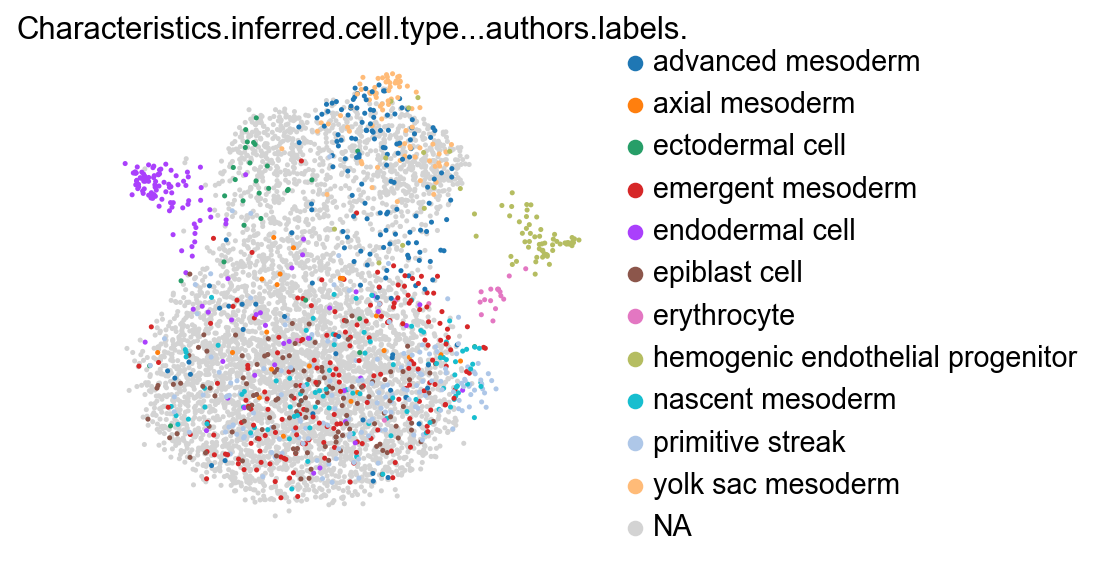

In [42]:
sc.pl.umap(dataset_samen, color=['Characteristics.inferred.cell.type...authors.labels.'], frameon=False, wspace=0.6)

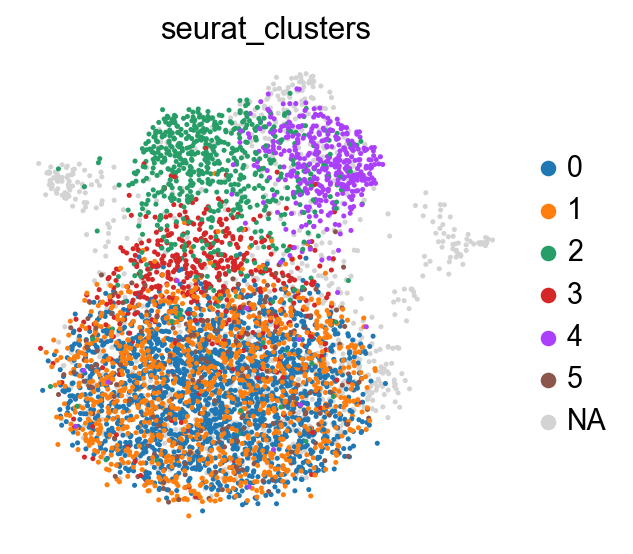

In [43]:

sc.pl.umap(dataset_samen, color=['seurat_clusters'], frameon=False, wspace=0.6)

In [44]:
dataset_samen.obs['orig.ident'] = dataset_samen.obs['orig.ident'].astype(str)


dataset_samen.write('hipstyser_integrated.h5ad')